<a href="https://colab.research.google.com/github/abh-i-hek/Network-Traffic-Classification-Using-ML-/blob/main/Option_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
import pandas as pa
import numpy as nm
from sklearn import preprocessing

df = pa.read_csv(r'/content/M2_data.csv')
df

,Option_Price,Maturity,IV,Moneyness
0,925.55,0.841096,5.971657e+00,1.018341
1,1150.30,0.841096,1.306964e+01,1.009167
2,1096.05,0.841096,7.864823e+00,1.000156
3,1043.55,0.841096,4.915707e+00,0.991305
4,992.85,0.841096,2.464963e+00,0.982610
...,...,...,...,...
17258,1175.20,0.002740,5.990000e+247,1.092340
17259,1131.50,0.002740,2.060000e+226,1.088089
17260,1076.00,0.002740,9.010000e+205,1.083872
17261,1279.35,0.002740,1.570000e+294,1.100941


In [154]:
df.isnull().any()

Option_Price    False
Maturity        False
IV              False
Moneyness       False
dtype: bool

In [155]:
nm.isnan(df.values.any()) # Check for NAN

False

In [156]:
X_train = X_train.fillna(X_train.mean())

In [157]:
df.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

,Option_Price,Maturity,IV,Moneyness
0,925.55,0.841096,5.971657e+00,1.018341
1,1150.30,0.841096,1.306964e+01,1.009167
2,1096.05,0.841096,7.864823e+00,1.000156
3,1043.55,0.841096,4.915707e+00,0.991305
4,992.85,0.841096,2.464963e+00,0.982610
...,...,...,...,...
17258,1175.20,0.002740,5.990000e+247,1.092340
17259,1131.50,0.002740,2.060000e+226,1.088089
17260,1076.00,0.002740,9.010000e+205,1.083872
17261,1279.35,0.002740,1.570000e+294,1.100941


In [167]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df=pa.DataFrame(x_scaled, columns=df.columns)

In [168]:
df.describe()

,Option_Price,Maturity,IV,Moneyness
count,17263.000000,17263.000000,1.726300e+04,17263.000000
mean,0.225564,0.502819,9.215944e-05,0.289621
std,0.199679,0.313600,8.450854e-03,0.151318
min,0.000000,0.000000,0.000000e+00,0.000000
25%,0.060993,0.199346,1.290301e-308,0.196023
50%,0.169162,0.545751,1.476080e-304,0.262586
75%,0.344925,0.781045,3.370607e-288,0.355286
max,1.000000,1.000000,1.000000e+00,1.000000


In [169]:
df.columns

Index(['Option_Price', 'Maturity ', 'IV', 'Moneyness'], dtype='object')

In [170]:
Y = df.Option_Price #Target 

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(13810, 4) (13810,)
(3453, 4) (3453,)


In [172]:
X_test.fillna(X_train.mean(), inplace=True)
X_test = X_test.fillna(X_train.mean())

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [173]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [174]:
y_pred = model.predict(X_test)

In [100]:
#min_max_scaler.inverse_transform(x_scaled)

In [175]:
pa.DataFrame(data={'predictions': y_pred, 'actual': y_test})

,predictions,actual
5307,0.043912,0.043896
5121,0.093097,0.092912
8411,0.002512,0.002455
6540,0.031858,0.031804
16881,0.269581,0.269664
...,...,...
7477,0.009754,0.009841
11196,0.009425,0.009537
12079,0.357103,0.357203
10068,0.135963,0.135998


In [189]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [177]:
mse_rf = mean_squared_error(y_test,y_pred)
print(mse_rf)

4.284372146447515e-08


In [180]:
from math import sqrt

rmse_rf_m1 = sqrt(mse_rf)

print('RMSE_M2 of Random Forest: %f' % rmse_rf_m3)

RMSE_M2 of Random Forest: 0.000190


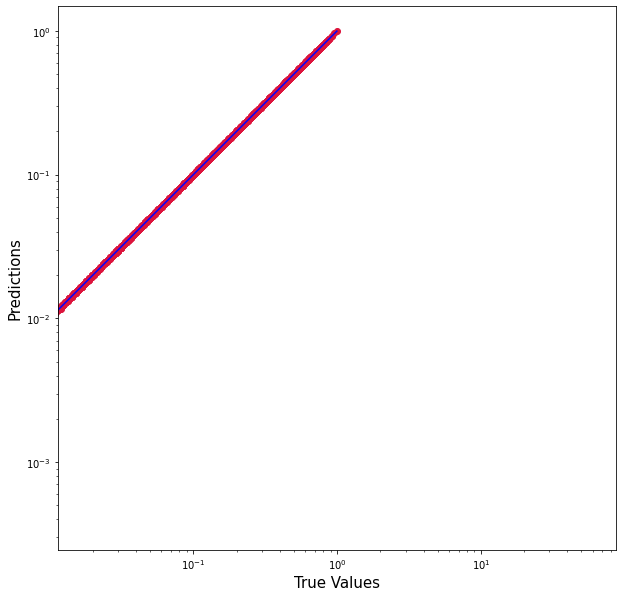

In [181]:
#Plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [183]:
mae_rf_m2 = mean_absolute_error(y_test,y_pred)

In [185]:
print(mae_rf_m2)

0.00011562629700274569


In [204]:
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_true)) * 100

In [205]:
mean_absolute_percentage_error(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


inf

In [206]:
print(mean_absolute_percentage_error)

<function mean_absolute_percentage_error at 0x7f4326776a70>
